## Observations and Insights

->This excercise was to analyse the effects of different drugs on cancer cells.We observed as to how different medicines were reacting to the Tumor volume over a period of 45 days. 

1.It is evident from the data that Ramicane and Capomulin are helping in reduction of Tumor Volumes.
2.Ketapril is worse than placebo, leading to increase in Tumor Volume
3.


## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
complete_df=pd.merge(mouse_metadata,study_results,on='Mouse ID',how='outer')
complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
TP=complete_df.pivot_table(index='Timepoint',columns='Drug Regimen',values='Tumor Volume (mm3)')  
TP

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,46.541247,47.389175,46.796098,47.125589,47.248967,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen

stat_mean=complete_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
stat_median=complete_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
stat_var=complete_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stat_std=complete_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
stat_sem=complete_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stat=pd.DataFrame({"Mean":stat_mean,
                           "Median":stat_median,
                           "Variance":stat_var,
                            "Standard Deviation":stat_std,
                            "SEM":stat_sem,
                           })

summary_stat

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

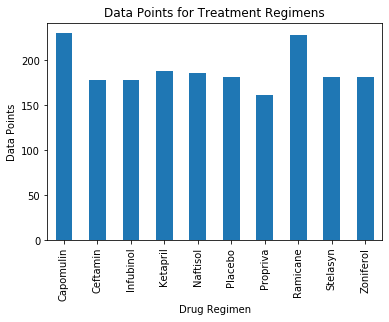

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

Table=complete_df.groupby('Drug Regimen')['Mouse ID'].count()
Table.plot(kind='bar')
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.title("Data Points for Treatment Regimens")
plt.show()

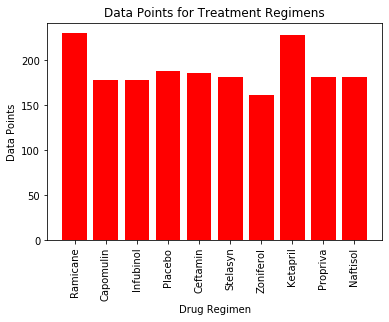

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis=complete_df['Drug Regimen'].unique()
y_axis=complete_df.groupby('Drug Regimen')['Timepoint'].count()
tick_loc=[value for value in x_axis]
plt.bar(x_axis,y_axis,color='r',align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.title("Data Points for Treatment Regimens")
plt.xticks(tick_loc,x_axis,rotation=90)
plt.show()

## Pie plots

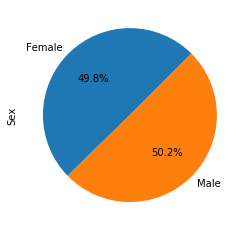

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_df=complete_df.drop_duplicates('Mouse ID')
plot_df=pie_df.groupby('Sex')['Sex'].count()
plot_df.plot.pie(y='Sex',autopct='%1.1f%%',startangle=45, fontsize=10)
plt.show()

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64


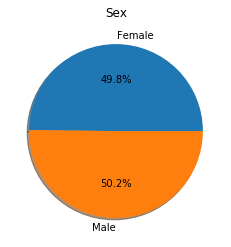

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_df=complete_df.drop_duplicates('Mouse ID')

x_axis=pie_df.groupby('Sex')['Mouse ID'].count()
print(x_axis)
labels=["Female","Male"]
plt.pie(x_axis,labels=labels,autopct='%1.1f%%',shadow=True, startangle=0)
plt.title("Sex")
plt.show()

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

cap_df = complete_df.loc[complete_df["Drug Regimen"] == "Capomulin",:]
cef_df = complete_df.loc[complete_df["Drug Regimen"] == "Ceftamin", :]
inf_df = complete_df.loc[complete_df["Drug Regimen"] == "Infubinol", :]
ram_df = complete_df.loc[complete_df["Drug Regimen"] == "Ramicane", :]

cap_box=cap_df.groupby('Mouse ID').last()
cef_box=cef_df.groupby('Mouse ID').last()
inf_box=inf_df.groupby('Mouse ID').last()
ram_box=ram_df.groupby('Mouse ID').last()

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Capomulin

TV1=cap_box['Tumor Volume (mm3)']

quartiles1 = TV1.quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1

lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"Capomulin {lower_bound1} & {upper_bound1}")


#Ceftamin

TV2=cef_box['Tumor Volume (mm3)']

quartiles2 = TV2.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ceftamin {lower_bound2} & {upper_bound2}")

#Infubinol

TV3=inf_box['Tumor Volume (mm3)']

quartiles3 = TV3.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol {lower_bound3} & {upper_bound3}")


#Ramicane

TV4=ram_box['Tumor Volume (mm3)']

quartiles4 = TV4.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Ramicane {lower_bound4} & {upper_bound4}")


Capomulin 20.70456164999999 & 51.83201549
Ceftamin 25.355449580000002 & 87.66645829999999
Infubinol 36.83290494999999 & 82.74144559000001
Ramicane 17.912664470000003 & 54.30681135


UndefinedVariableError: name 'TV4' is not defined

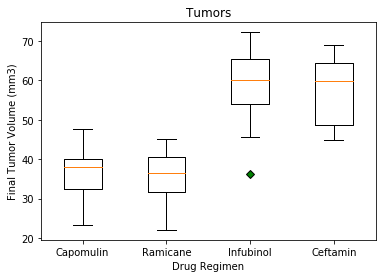

In [16]:
#Capomulin, Ramicane, Infubinol, and Ceftamin

green_diamond = dict(markerfacecolor='g', marker='D')
plot_data=[TV1,TV4,TV3,TV2]
fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(plot_data, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"],flierprops=green_diamond)

plt.show()


## Line and scatter plots

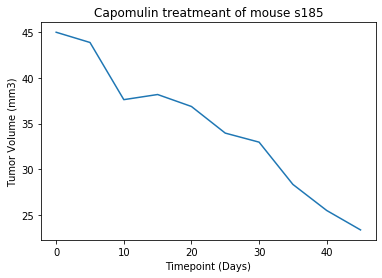

In [11]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_df = cap_df.loc[cap_df["Mouse ID"] == "s185",:]
line_df

x_axis_line=line_df['Timepoint']
y_axis_line=line_df['Tumor Volume (mm3)']

plt.title('Capomulin treatmeant of mouse s185')
plt.plot(x_axis_line, y_axis_line)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

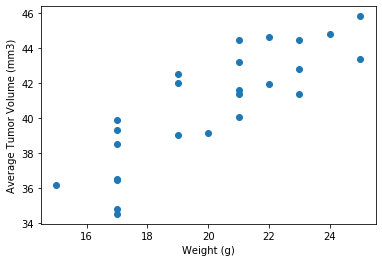

In [12]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
ATV=cap_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
Mouse_w=cap_df.groupby('Mouse ID')['Weight (g)'].first()

plt.scatter(Mouse_w,ATV)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


In [13]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
coco=round(st.pearsonr(ATV,Mouse_w)[0],2)
print(f"Relationship between Mouse-Weight & Average Tumor Volume is {coco}")

LRM=st.linregress(Mouse_w,ATV)
LRM

Relationship between Mouse-Weight & Average Tumor Volume is 0.84


LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712645e-07, stderr=0.1275435903320134)

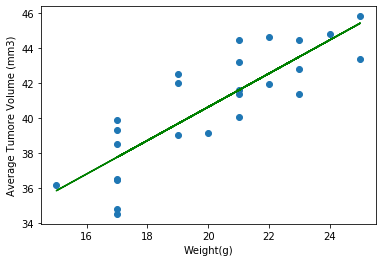

In [14]:
#y=mx+c
m=0.9544396890241045
c=21.552160532685015
y=(Mouse_w)*m+c
plt.scatter(Mouse_w,ATV)
plt.plot(Mouse_w,y,color='green')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.show()